In [ ]:
!pip install tensorflow
!pip install numpy

In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [11]:
"""
Loading the dataset 

- data are lists of reviews -- each review is a list of word indices (encoding a sequence of words)
- labels are 0's and 1's (positive/negative reviews)
"""
num_words = 10000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=num_words) # Only keep the top 10,000 most frequently occuring words in training data


# Decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

print(decoded_review)



? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
# ------------- Preparing the data --------------------- #
"""
  Can't feed lists of integers into a neural network. 
  Must turn lists into tensors.

  This is done in one of two ways:

    1. Pad lists so they have the same length, then turn them into a tensor of 
    shape (samples, max_length) 

    2. Multi-Hot Encode - lists turn into vectors of 0's and 1's
"""

# Encoding with multi-hot
def vectorize_sequences(sequences, dimension=num_words):
  """
    Creates vectors of 0's and 1's where each row corresponds to a sequence and 
    each column corresponds to a specific word in a predefined vocabulary. 
    
    If a word appears in a sequence, the corresponding entry in the matrix is 
    set to 1, otherwise it is left as 0.
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1

  return results

# Vectorizing data
print("Vectorizing Data:\n=========================\n")
print(f"Before: {train_data}\n")

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f"After: {x_train}\n")

# Vectorizing labels
print("Vectorizing Labels:\n=========================\n")
print(f"Before: {train_labels}\n")

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(train_labels).astype("float32")

print(f"After: {y_train}\n")


Vectorizing Data:

Before: [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 

In [13]:
# ------------- Building the Model --------------------- #
"""
  Two key architecture decisions to be made:

    1. How many layers to use
    2. How many units to choose for each layer

  For this example, we will have:
    - 2 intermediate layers with 16 units each
    - A 3rd layer that will output the scalar prediction for the current review

"""

model = keras.Sequential([
    # The first argument is the number of units in the layer 
    # (dimensionality of the layer)
    layers.Dense(16, activation="relu"),    # ReLU stands for Rectified Linear Unit - returns the input value if it is positive and zero otherwise. 
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")   # sigmoid maps any input value to a range between 0 and 1. Output is interpreted as the probability of the input belonging to the positive class.
])


# Compiling the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"
])

In [16]:
# ------------- Validating the Model --------------------- #


# Creating a validation set of 10,000 samples
x_val = x_train[:num_words]
partial_x_train = x_train[num_words:]
y_val = y_train[:num_words]
partial_y_train = y_train[num_words:]


# Training the model
"""
  - model.fit() returns a History objects which contains data about everything 
  that happend during training

  - epochs = number of iterations over all samples in training data

  - Monitor loss and accuracy by passing validation_data arg.
"""
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5261 - accuracy: 0.7873 - val_loss: 0.4079 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3326 - accuracy: 0.8931 - val_loss: 0.3177 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2495 - accuracy: 0.9181 - val_loss: 0.3030 - val_accuracy: 0.8763
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2027 - accuracy: 0.9325 - val_loss: 0.2927 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1731 - accuracy: 0.9423 - val_loss: 0.2897 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1439 - accuracy: 0.9546 - val_loss: 0.2868 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1259 - accuracy: 0.9610 - val_loss: 0.2897 - val_accuracy: 0.8866
Epoch 8/20
30

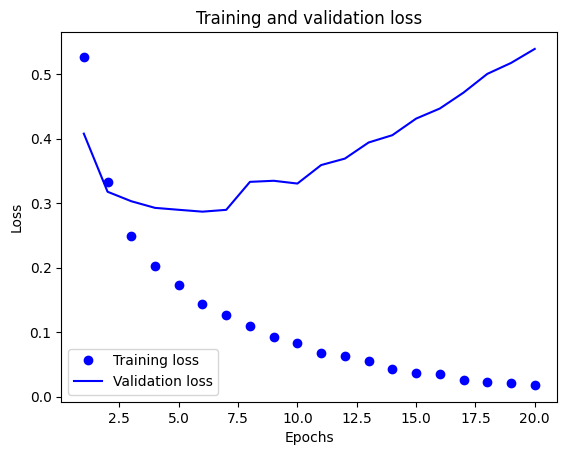

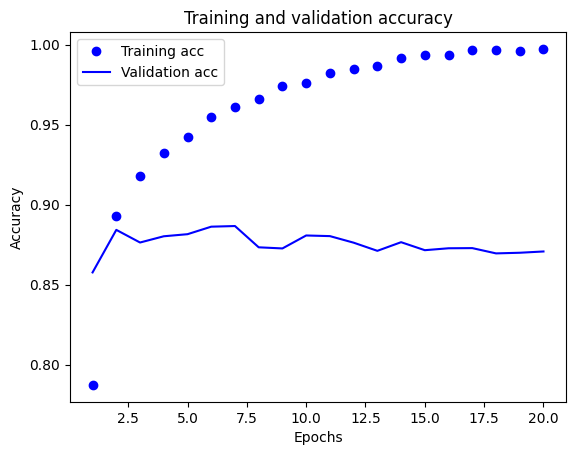

In [17]:
import matplotlib.pyplot as plt


# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# print()

# # Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Overfitting

* The training loss should decrease with every epoch
* The training accuracy should increase with every epoch

In this example, the training loss and accuracy are what we'd expect. But the valididation loss and accuracy seem to peak at the fourth epoch, and after that, we are overoptimizing on the training data and thus, our data is overfit.

To prevent overfitting, we can stop training after 4 epochs. (There are other techniques to mitigate this as well)

In [18]:
# Retraining the model with 4 epochs this time

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=7, batch_size=516, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

print(f"Results: {results}")

Epoch 1/7
49/49 [==============================] - 3s 40ms/step - loss: 0.4701 - accuracy: 0.8132 - val_loss: 0.3374 - val_accuracy: 0.8784
Epoch 2/7
49/49 [==============================] - 1s 20ms/step - loss: 0.2774 - accuracy: 0.9034 - val_loss: 0.2384 - val_accuracy: 0.9157
Epoch 3/7
49/49 [==============================] - 1s 22ms/step - loss: 0.2164 - accuracy: 0.9226 - val_loss: 0.1765 - val_accuracy: 0.9444
Epoch 4/7
49/49 [==============================] - 1s 20ms/step - loss: 0.1850 - accuracy: 0.9332 - val_loss: 0.1507 - val_accuracy: 0.9536
Epoch 5/7
49/49 [==============================] - 1s 22ms/step - loss: 0.1608 - accuracy: 0.9444 - val_loss: 0.1465 - val_accuracy: 0.9525
Epoch 6/7
49/49 [==============================] - 1s 21ms/step - loss: 0.1443 - accuracy: 0.9489 - val_loss: 0.1158 - val_accuracy: 0.9654
Epoch 7/7
782/782 [==============================] - 2s 3ms/step - loss: 2.2951 - accuracy: 0.5006
Results: [2.2951128482818604, 0.5005999803543091]


## Key Takeaways:

* Typically, you'll need to do quite a bit of preprocessing on raw data in order to be able to feed it (as tensors) into a neural network.
* Stacks of Dense Layers with **relu** activations can solve a wide range of problems and will be frequently used
* Binary classification problems should end with a Dense layer with 1 unit and a **sigmoid** activation. The output should be a scalar between 0 and 1, indicating a probability
* With a sigmoid output on classification problems, use binary_crossentrophy
* **rmsprop** optimizer is a good choice regardless of the problem
* Monitor performance on data that is outside the training set to prevent overfitting